### Kulak & Grondin Example 8.2
This example is from "*Limit States Design in Structural Steel*", Ninth Edition, CISC, by Kulak and Grondin.
It illustrates using the fictitious load method to determine second-order effects (i.e., the $P-\Delta$ method).

In [1]:
from salib import extend, import_notebooks
from Tables import Table
from Frame2D import Frame2D

Compiling notebook 'Frame2D_Output.ipynb' to 'Frame2D_Output.py'.


![Kulak & Grondin Example 8.2](data/KG82.d/KG82a.jpg)
In order account for initial out-of-straightness and partial yielding, *notional* lateral loads 
equal to 0.005 times the factored gravity loads contributed by each level are added to each level 
(CSA S16-09 8.4.1).  At node **H** that will be $45 \times (10+10.5+10) \times 0.005 = 6.9\ kN$ 
and at node **G** it is $55 \times (10+10.5+10) \times 0.005 = 8.4\ kN$.  These notional loads 
will be included in addition to the lateral forces shown above.

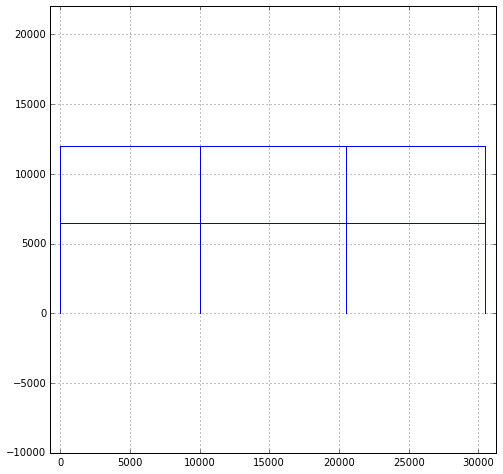

In [2]:
f = Frame2D('KG82')
f.input_all()

%matplotlib inline
f.show()

In [3]:
R = f.solve()
f.print_input()
f.print_results(rs=R)


Frame KG82:


              # of nodal degrees of freedom: 36
  # of constrained nodal degrees of freedom: 10
# of unconstrained nodal degrees of freedom: 26  (= degree of kinematic indeterminacy)

                               # of members: 14
                             # of reactions: 10
                                 # of nodes: 12
                            # of conditions: 8
           degree of statical indeterminacy: 8



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A         10000         0  FX,FY,MZ     26,27,28
B         10000      6500               0,1,2
C         10000     12000               3,4,5
D         20500         0  FX,FY,MZ     29,30,31
E         20500      6500               6,7,8
F         20500     12000               9,10,11
G         30500      6500               12,13,14
H         30500     12000               15,16,17
I         30500         0  FX,FY        32,33,18
J             0         0  

The above are the results of a first-order analysis and should be compared with those shown in the following figure from Kulak & Grondin:

![Frame](data/KG82.d/KG82b.jpg)

### Compare book values (end bending moments)

In [4]:
import pandas as pd

BM = [('AB',44.2,-57.5),    # values given on figure, above
      ('BC',-232.,-236.),
      ('DE',181.,227.),
      ('EF',287.,330.),
      ('BE',290.,-515.),
      ('CF',236.,-330.)]

BOOK = pd.DataFrame({m:{'MZJ':a,'MZK':b} for m,a,b in BM}).T
BOOK

,MZJ,MZK
AB,44.2,-57.5
BC,-232.0,-236.0
BE,290.0,-515.0
CF,236.0,-330.0
DE,181.0,227.0
EF,287.0,330.0


In [5]:
HERE = pd.DataFrame([(m.id,ef.m2/1e6,ef.m5/1e6) 
                     for m,ef in R.member_efs.items()],columns=['ID','MZJ','MZK']).set_index(['ID'])
HERE = HERE.ix[BOOK.index]
HERE

,MZJ,MZK
AB,41.899586,-56.055426
BC,-241.072569,-244.969631
BE,297.127995,-522.644884
CF,244.969631,-338.085575
DE,184.367580,226.663606
EF,295.981278,338.085575


#### % Difference in End Moments

In [6]:
(100*(HERE-BOOK)/HERE).round(2)

,MZJ,MZK
AB,-5.49,-2.58
BC,3.76,3.66
BE,2.40,1.46
CF,3.66,2.39
DE,1.83,-0.15
EF,3.03,2.39


Max. difference is 5.5%, which I think is a little large.

### Compare Reactions

In [7]:
REAC = pd.DataFrame(f.list_reaction_forces(R),columns=['ID','FX','FY','MZ']).set_index(['ID'])
REAC[['FY']]/1E3

,FY
ID,
A,994.654016
D,1055.345984
I,500.000000
J,500.000000


The reactions agree very closely.
## $P-\Delta$ Analysis

In [8]:
f.reset()
f.input_all()
rs = f.solve(pdelta=True)
f.print_results(rs)
f.write_results(f.dsname,rs)

iter=1, max D=40.0705905519, max chg=5.37754613514, max % chg=13.4201818867
iter=2, max D=40.9144007916, max chg=0.843834955693, max % chg=2.06243997069
iter=3, max D=41.0471570086, max chg=0.132760379933, max % chg=0.323433800557
iter=4, max D=41.0680614969, max chg=0.0209051473164, max % chg=0.0509036622484
iter=5, max D=41.0713541602, max chg=0.00329276702251, max % chg=0.00801718640606


Results for load case: all
++++++++++++++++++++++++++


Node Displacements:

Node        DX         DY      Rotation
----      ------     ------   ---------
A          0.000      0.000   0.0000000
B         26.392     -2.614  -0.0075457
C         41.059     -3.622  -0.0075611
D          0.000      0.000   0.0000000
E         26.745     -2.803   0.0027204
F         40.706     -3.858   0.0055544
G         26.889     -1.321  -0.0032662
H         40.801     -1.824  -0.0021613
I          0.000      0.000  -0.0045720
J          0.000      0.000  -0.0044338
K         26.378     -1.321  -0.0033071
L       

The above are the results of a second-order ($P-\Delta$) analysis and should be compared with the following figure from Kulak & Grondin:

![Final P-Delta Result](data/KG82.d/KG82c.jpg)

In [9]:
import pandas as pd

BM = [('AB',64.0,-39.2),    # values given on gigure, above
      ('BC',-236.,-237.),
      ('DE',207.,244.),
      ('EF',301.,347.),
      ('BE',276.,-544.),
      ('CF',237.,-347.)]

BOOK = pd.DataFrame({m:{'MZJ':a,'MZK':b} for m,a,b in BM}).T
BOOK

,MZJ,MZK
AB,64.0,-39.2
BC,-236.0,-237.0
BE,276.0,-544.0
CF,237.0,-347.0
DE,207.0,244.0
EF,301.0,347.0


In [10]:
HERE = pd.DataFrame([(m.id,ef.m2/1e6,ef.m5/1e6) 
                     for m,ef in rs.member_efs.items()],columns=['ID','MZJ','MZK']).set_index(['ID'])
HERE = HERE.ix[BOOK.index]
HERE

,MZJ,MZK
AB,63.324512,-39.761879
BC,-236.572716,-236.820752
BE,276.334595,-543.438243
CF,236.820752,-346.231622
DE,205.797688,242.962366
EF,300.475876,346.231622


#### % Difference in End Moments

In [11]:
(100*(HERE-BOOK)/HERE).round(2)

,MZJ,MZK
AB,-1.07,1.41
BC,0.24,-0.08
BE,0.12,-0.10
CF,-0.08,-0.22
DE,-0.58,-0.43
EF,-0.17,-0.22


Max. difference is 1.4%, which is much better and is actually quite decent.